In [43]:
%matplotlib inline
import numpy as np
import pandas as pd

In [10]:
#載入文字雲套件
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#斷詞分析的套件
import jieba
import nltk

from bs4 import BeautifulSoup

### 指定目標URL、並解析HTML

In [13]:
import requests
url = 'https://news.google.com/topics/CAAqJQgKIh9DQkFTRVFvSUwyMHZNR3QwTlRFU0JYcG9MVlJYS0FBUAE?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant'
r = requests.get(url)
web_content = r.text
soup = BeautifulSoup(web_content,'lxml')

In [15]:
soup

<!DOCTYPE html>
<html dir="ltr" lang="zh"><head><base href="https://news.google.com/"/><meta content="origin" name="referrer"/><link href="https://news.google.com/topics/CAAqJQgKIh9DQkFTRVFvSUwyMHZNR3QwTlRFU0JYcG9MVlJYS0FBUAE" rel="canonical"/><meta content="width=device-width,initial-scale=1,minimal-ui" name="viewport"/><meta content="app-id=459182288" name="apple-itunes-app"/><meta content="AcBy5YFny2HQgVUCR18tO5YUTf6MpVlcJqGTd-a9-SI" name="google-site-verification"/><meta content="yes" name="mobile-web-app-capable"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="新聞" name="application-name"/><meta content="新聞" name="apple-mobile-web-app-title"/><meta content="black" name="apple-mobile-web-app-status-bar-style"/><meta content="white" name="theme-color"/><meta content="no" name="msapplication-tap-highlight"/><link href="https://lh3.googleusercontent.com/-DR60l-K8vnyi99NZovm9HlXyZwQ85GMDxiwJWzoasZYCUrPuUM_P_4Rb7ei03j-0nRs0c4F=w16" rel="shortcut icon" sizes="16x1

* 每個文章小卡都是包覆在class = ‘xrnccd’的div物件中
* 整個文章小卡點擊區塊連結: class = “VDXfz”
* 文章小卡中的標題則是包覆在class為’Da10Tb Rai5ob’的div物件中
* 標題文字則是在<span></span>標籤中

### 找出所有新聞標題

In [25]:
title = soup.find_all('div',class_='xrnccd F6Welf R7GTQ keNKEd j7vNaf')
print(title)

[<div class="xrnccd F6Welf R7GTQ keNKEd j7vNaf"><a aria-labelledby="i6" href="./articles/CBMiJGh0dHA6Ly90aW1lcy5oaW5ldC5uZXQvbmV3cy8yMjgxMDA2NNIBAA?hl=zh-TW&amp;gl=TW&amp;ceid=TW%3Azh-Hant" tabindex="-1" target="_blank"><figure class="AZtY5d fvuwob MbMxpc d7hoq" id="i6"><img alt="" class="tvs3Id QwxBBf" loading="lazy" src="https://lh4.googleusercontent.com/proxy/tiybgyjCOyzna23jyn2wRdax97pl_R-5J3sOkm-3W8m9LuBMMZWuP3Aofq_UV9bx5cXS4kJ8ywMjfQ79epwFR2J048X8-toG7n9-y04UcBLTKuTqg4MBFPjeu5Adc-0=-p-h100-w100" srcset="https://lh4.googleusercontent.com/proxy/tiybgyjCOyzna23jyn2wRdax97pl_R-5J3sOkm-3W8m9LuBMMZWuP3Aofq_UV9bx5cXS4kJ8ywMjfQ79epwFR2J048X8-toG7n9-y04UcBLTKuTqg4MBFPjeu5Adc-0=-p-h100-w100 1x, https://lh4.googleusercontent.com/proxy/tiybgyjCOyzna23jyn2wRdax97pl_R-5J3sOkm-3W8m9LuBMMZWuP3Aofq_UV9bx5cXS4kJ8ywMjfQ79epwFR2J048X8-toG7n9-y04UcBLTKuTqg4MBFPjeu5Adc-0=-p-h200-w200 2x"/></figure></a><article class="MQsxIb xTewfe R7GTQ keNKEd j7vNaf Cc0Z5d EjqUne" data-kind="13" data-n-cvid="i7" data

In [26]:
titles = [t.find('span').text for t in title]
titles

['嘴角出現小水泡，癢癢又痛痛，而且總是在人很累、很忙、睡不飽的時候出現，特別讓人煩躁。但其實這個小水泡反而是身體告訴你要照顧健康的「警訊」，因為它代表的 ...',
 '你經常發現自己常說「啥？」，或者視力不像以前那樣好，看遠看近都模糊不清，甚至走路都開始不穩，本體感覺隨著年齡而變得矛盾。老年醫學專家Ronan Factora表示 ...',
 '屏東縣出現首例登革熱境外移入確診個案，住在萬丹鄉的三十五歲女性，今年二月六日至十六日期間曾回越南西寧探親，二月二十二日出現發燒、 關節痛、肌肉痛及 ...',
 '民以食為天，但吃的東西、方式不對，卻可能讓身體長出癌症。根據衛福部2018年的統計資料，連續37年蟬聯國人十大死因榜首的癌症，雖然發生率最高還是大腸直腸 ...',
 '隨著新型冠狀病毒疫情在全球持續蔓延，恐慌也日益加重，各界渴望知道疫情究竟何時能獲得控制，進而平息？整起事件對全球經濟影響面向、程度又是如何？']

### 找出新聞標題所對應的資料來源links

取得新聞文章真實URL:
* 找出標題區塊<a></a>標籤並萃取出href的值
* 將href值中’.’取代為當下的domain，得到須經轉換的URL
* 將須經轉換的URL丟入request.get()函式中，並使用.url取得文章真實的URL

In [27]:
newUrls = [requests.get(t.find('a')['href'].replace('.','https://news.google.com',1)).url for t in title]
newUrls

['https://times.hinet.net/news/22810064',
 'http://www.healthnews.com.tw/news/article/45201/?act=',
 'https://news.ltn.com.tw/news/life/paper/1355678',
 'https://times.hinet.net/news/22809553',
 'https://udn.com/news/story/7338/4381970']

### 將標題與連結合併成data frame

In [28]:
df = pd.DataFrame(
{    'title': titles,
    'links': newUrls
})
 
df

,title,links
0,嘴角出現小水泡，癢癢又痛痛，而且總是在人很累、很忙、睡不飽的時候出現，特別讓人煩躁。但其實這...,https://times.hinet.net/news/22810064
1,你經常發現自己常說「啥？」，或者視力不像以前那樣好，看遠看近都模糊不清，甚至走路都開始不穩，...,http://www.healthnews.com.tw/news/article/4520...
2,屏東縣出現首例登革熱境外移入確診個案，住在萬丹鄉的三十五歲女性，今年二月六日至十六日期間曾回...,https://news.ltn.com.tw/news/life/paper/1355678
3,民以食為天，但吃的東西、方式不對，卻可能讓身體長出癌症。根據衛福部2018年的統計資料，連續...,https://times.hinet.net/news/22809553
4,隨著新型冠狀病毒疫情在全球持續蔓延，恐慌也日益加重，各界渴望知道疫情究竟何時能獲得控制，進而...,https://udn.com/news/story/7338/4381970


### 使用jieba套件，進行文章中文斷詞分析

In [29]:
url = df['links'][0]
print(url)
r = requests.get(url)
web_content = r.text
soup = BeautifulSoup(web_content,'lxml')

https://times.hinet.net/news/22810064


In [30]:
articleContent = soup.find_all('p')
articleContent

[<p><span style="color: #785d3c;">嘴角出現小水泡，癢癢又痛痛，而且總是在人很累、很忙、睡不飽的時候出現，特別讓人煩躁。但其實這個小水泡反而是身體告訴你要照顧健康的「警訊」，因為它代表的意義是「免疫力下降」了！</span></p>,
 <p>皰疹病毒是非常常見的病毒，幾乎所有人身上都有這種病毒，而這種病毒會透過接觸傳染，感染之後就潛伏在身體中，等待免疫力下降的時候再跑出來「作怪」。</p>,
 <p>皰疹病毒是五十幾種病毒的總稱，常見的有3種，包括「單純皰疹病毒」，會引起水痘、帶狀皰疹的「水痘帶狀皰疹病毒」，以及可能引起傳染性單核球增生症，甚至是鼻咽癌的「EB病毒」。</p>,
 <p><img alt="" class="aligncenter wp-image-40671" data-attachment-id="40671" data-comments-opened="1" data-image-description="" data-image-meta='{"aperture":"0","credit":"","camera":"","caption":"","created_timestamp":"0","copyright":"","focal_length":"0","iso":"0","shutter_speed":"0","title":"","orientation":"0"}' data-image-title="皰疹-01" data-large-file="https://img.heho.com.tw/wp-content/uploads/2017/12/皰疹-01.png" data-medium-file="https://img.heho.com.tw/wp-content/uploads/2017/12/皰疹-01.png" data-orig-file="https://img.heho.com.tw/wp-content/uploads/2017/12/皰疹-01.png" data-orig-size="1200,630" data-permalink="https://heho.com.tw/archives/5604/%e7%9a%b0%e7%96%b9-01-2" height="3

### 將所有tag p中的text取出並放進list。

In [31]:
article = []
for p in articleContent:
    article.append(p.text)

### 將list中的text元素join合併成一個字串，並以特殊字元’\n’來間隔

In [32]:
articleAll = '\n'.join(article)
print(articleAll)

嘴角出現小水泡，癢癢又痛痛，而且總是在人很累、很忙、睡不飽的時候出現，特別讓人煩躁。但其實這個小水泡反而是身體告訴你要照顧健康的「警訊」，因為它代表的意義是「免疫力下降」了！
皰疹病毒是非常常見的病毒，幾乎所有人身上都有這種病毒，而這種病毒會透過接觸傳染，感染之後就潛伏在身體中，等待免疫力下降的時候再跑出來「作怪」。
皰疹病毒是五十幾種病毒的總稱，常見的有3種，包括「單純皰疹病毒」，會引起水痘、帶狀皰疹的「水痘帶狀皰疹病毒」，以及可能引起傳染性單核球增生症，甚至是鼻咽癌的「EB病毒」。

而會引起嘴角旁邊小水泡的病毒，就是「單純皰疹病毒」的第一型（HSV 1），大部分的人在嬰兒期或幼兒期就已經感染第一型單純皰疹，通常是藉由碗盤、毛巾、親吻傳染；大部分人在感染之後不會有明顯症狀，小部分人會在嘴角、嘴唇、鼻子、下巴或是臉頰上產生一粒粒的小水泡，感覺刺癢、刺痛，但通常1~2週之後就會自己消失。
皰疹的症狀
不過雖然皰疹病毒會在身體裡面潛伏，平常卻也還是可以跟自己「相安無事」，但在免疫力下降的時候，就會趁機跑出來，造成其他地方的感染。
而皰疹病毒在第一次感染之後，就會潛伏在神經細胞內，等待免疫細胞衰弱的一天，再沿著神經跑出來感染，所以一旦發作，也有可能會引起神經疼痛的症狀。所以一旦看到皰疹出來，就表示身體的免疫系統現在是「休眠」的狀態，即使沒有特別的症狀，也要注意身體的小警訊。
圖說／身體很累的時候，免疫力也會跟著下降。
誘發皰疹的因子
不過雖然皰疹代表免疫力不足，但正常來說，只要皰疹發作的時候，多休息、三餐正常吃，1~2週之內就可以恢復；但在這期間要注意，因為皰疹是會傳染的，所以千萬不要共用毛巾，或是對病灶位置有親密接觸，例如接吻。
而如果1~2週內都沒有恢復，可能代表有其他的疾病，就需要去看皮膚科醫生，先排除其他的皮膚疾病，如果還是都沒有好，建議可以去看免疫風濕科，或是去做更詳細的全身檢查。
參考資料
衛生福利部彰化醫院衛教資料
文／盧映慈 圖／何宜庭
>> 加入 Heho健康 LINE@ 好友，健康知識不錯過！
延伸閱讀
免疫力下降，當心你身體裡少了這8種重要物質
體溫升 1 度免疫力翻 5 倍！ 5 種方法讓你「暖身」
腳上長水泡不一定是香港腳 還有可能是超難根治的汗皰疹
降雨：
氣溫：℃
從某種意義上來說，宇宙是不變的， 因為它的運動是由不可改變的法則來決定的， 

### 移除標點符號

In [34]:
d = articleAll.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','')
print(d)

嘴角出現小水泡癢癢又痛痛而且總是在人很累很忙睡不飽的時候出現特別讓人煩躁但其實這個小水泡反而是身體告訴你要照顧健康的警訊因為它代表的意義是免疫力下降了
皰疹病毒是非常常見的病毒幾乎所有人身上都有這種病毒而這種病毒會透過接觸傳染感染之後就潛伏在身體中等待免疫力下降的時候再跑出來作怪
皰疹病毒是五十幾種病毒的總稱常見的有3種包括單純皰疹病毒會引起水痘帶狀皰疹的水痘帶狀皰疹病毒以及可能引起傳染性單核球增生症甚至是鼻咽癌的EB病毒

而會引起嘴角旁邊小水泡的病毒就是單純皰疹病毒的第一型HSV 1大部分的人在嬰兒期或幼兒期就已經感染第一型單純皰疹通常是藉由碗盤毛巾親吻傳染；大部分人在感染之後不會有明顯症狀小部分人會在嘴角嘴唇鼻子下巴或是臉頰上產生一粒粒的小水泡感覺刺癢刺痛但通常1~2週之後就會自己消失
皰疹的症狀
不過雖然皰疹病毒會在身體裡面潛伏平常卻也還是可以跟自己相安無事但在免疫力下降的時候就會趁機跑出來造成其他地方的感染
而皰疹病毒在第一次感染之後就會潛伏在神經細胞內等待免疫細胞衰弱的一天再沿著神經跑出來感染所以一旦發作也有可能會引起神經疼痛的症狀所以一旦看到皰疹出來就表示身體的免疫系統現在是休眠的狀態即使沒有特別的症狀也要注意身體的小警訊
圖說身體很累的時候免疫力也會跟著下降
誘發皰疹的因子
不過雖然皰疹代表免疫力不足但正常來說只要皰疹發作的時候多休息三餐正常吃1~2週之內就可以恢復；但在這期間要注意因為皰疹是會傳染的所以千萬不要共用毛巾或是對病灶位置有親密接觸例如接吻
而如果1~2週內都沒有恢復可能代表有其他的疾病就需要去看皮膚科醫生先排除其他的皮膚疾病如果還是都沒有好建議可以去看免疫風濕科或是去做更詳細的全身檢查
參考資料
衛生福利部彰化醫院衛教資料
文盧映慈 圖何宜庭
>> 加入 Heho健康 LINE@ 好友健康知識不錯過
延伸閱讀
免疫力下降當心你身體裡少了這8種重要物質
體溫升 1 度免疫力翻 5 倍 5 種方法讓你暖身
腳上長水泡不一定是香港腳 還有可能是超難根治的汗皰疹
降雨
氣溫℃
從某種意義上來說宇宙是不變的 因為它的運動是由不可改變的法則來決定的 那些法則使它永遠地運轉著 沒有起點沒有終點 它的各部分顯露消失 然後又新生...

著作權保護 ∣
		隱私權保護 ∣
		企業社會責任 ∣
		兒童網路安全 ∣
		刊登廣告 ∣
		 人才招募 ∣


### 分別使用不同斷詞模式

In [35]:
Sentence = jieba.cut(d, cut_all=True)
print('全模式'+": "  + "/ ".join(Sentence) + '\n')   
 
Sentence = jieba.cut(d, cut_all=False)
print('精確模式'+": " + "/ ".join(Sentence)+ '\n')  
 
Sentence = jieba.cut(d)  
print('Default為精確模式'+": " + "/ ".join(Sentence)+ '\n')
 
Sentence = jieba.cut_for_search(d)  
print('搜索引擎模式'+": " + "/ ".join(Sentence)+ '\n')

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 1.343 seconds.
Prefix dict has been built successfully.


全模式: 嘴角/ 出/ 現/ 小水/ 水泡/ 癢/ 癢/ 又/ 痛痛/ 而且/ 總/ 是/ 在/ 人/ 很/ 累/ 很忙/ 睡/ 不/ 飽/ 的/ 時/ 候/ 出/ 現/ 特/ 別/ 讓/ 人/ 煩/ 躁/ 但/ 其/ 實/ 這/ 個/ 小水/ 水泡/ 反而/ 而是/ 身/ 體/ 告/ 訴/ 你/ 要/ 照/ 顧/ 健康/ 的/ 警/ 訊/ 因/ 為/ 它/ 代表/ 的/ 意/ 義/ 是/ 免疫/ 免疫力/ 下降/ 了/ / 
/ / 皰疹/ 病毒/ 是非/ 非常/ 常常/ 見/ 的/ 病毒/ 幾/ 乎/ 所有/ 所有人/ 有人/ 人身/ 身上/ 都/ 有/ 這/ 種/ 病毒/ 而/ 這/ 種/ 病毒/ 會/ 透/ 過/ 接/ 觸/ 傳/ 染/ 感染/ 之/ 後/ 就/ 潛/ 伏/ 在/ 身/ 體/ 中等/ 等待/ 免疫/ 免疫力/ 下降/ 的/ 時/ 候/ 再/ 跑/ 出/ 來/ 作怪/ / 
/ / 皰疹/ 病毒/ 是/ 五十/ 幾/ 種/ 病毒/ 的/ 總/ 稱/ 常/ 見/ 的/ 有/ 3/ 種/ 包括/ 單/ 純/ 皰疹/ 病毒/ 會/ 引起/ 水痘/ 帶/ 狀/ 皰疹/ 的/ 水痘/ 帶/ 狀/ 皰疹/ 病毒/ 以及/ 可能/ 引起/ 傳/ 染/ 性/ 單/ 核球/ 增生/ 增生症/ 甚至/ 是/ 鼻咽/ 鼻咽癌/ 的/ EB/ 病毒/ / 
/ / 
/ / 而/ 會/ 引起/ 嘴角/ 旁/ 邊/ 小水/ 水泡/ 的/ 病毒/ 就是/ 單/ 純/ 皰疹/ 病毒/ 的/ 第一/ 型/ HSV/ /  / / 1/ 大部/ 大部分/ 部分/ 的/ 人/ 在/ 嬰/ 兒/ 期/ 或/ 幼/ 兒/ 期/ 就/ 已/ 經/ 感染/ 第一/ 型/ 單/ 純/ 皰疹/ 通常/ 是/ 藉由/ 碗/ 盤/ 毛巾/ 親/ 吻/ 傳/ 染/ ；/ 大部/ 大部分/ 部分/ 人/ 在/ 感染/ 之/ 後/ 不/ 會/ 有/ 明/ 顯/ 症/ 狀/ 小部/ 部分/ 人/ 會/ 在/ 嘴角/ 嘴唇/ 鼻子/ 下巴/ 或是/ 臉/ 頰/ 上/ 產/ 生/ 一粒/ 粒粒/ 的/ 小水/ 水泡/ 感/ 覺/ 刺/ 癢/ 刺痛/ 但/ 通常/ 1/ ~/ 2/ 週/ 之/ 後/ 就/ 會/ 自己/ 消失/ / 
/ / 皰疹/ 的/ 症/ 狀/ / 
/ / 不/ 過/ 雖/ 然/ 皰疹

### 將字詞頻率以word cloud(文字雲)呈現

設定停用字stopwords(排除常用詞、無法代表特殊意義的字詞)

In [36]:
#設定停用字詞 
stopwords = {}.fromkeys(["也","但","來","個","再","的","和","是","有","更","會","可能","有何","從","對","就", '\n','越','為','這種','多','越來',' '])

### 方法一:generate_from_frequencies()
會忽略stopwords參數的部分，所以在產生hash dictionary字詞頻率時須先自行挑除。

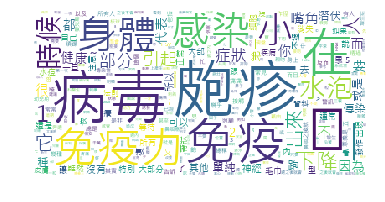

<Figure size 4000x2000 with 0 Axes>

In [41]:
# 使用cut_for_search(搜尋引擎)斷詞模式並產生字詞頻率的dictionary (並剔除stopwords的計算)
Sentence = jieba.cut_for_search(d) 
 
# create a python dictionary
hash = {}
for item in Sentence:
 
    if item in stopwords:
        continue
    
    if item in hash:
        hash[item] += 1
    else:
        hash[item] = 1
 
# 文字雲樣式設定
font = r'msjh.ttc'
wc = WordCloud(font_path=font,           #設置字體:微軟正黑體
               background_color="white", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞
 
# 使用dictionary的內容產生文字雲
wc.generate_from_frequencies(hash)
 
# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(20,10), dpi =200)
plt.show()

### 方法二:generate_from_text()
會採納stopwords參數，所以不用特別對text做stopwords的挑除

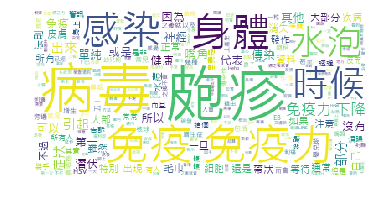

<Figure size 4000x2000 with 0 Axes>

In [42]:
Sentence = jieba.cut_for_search(d) 
text = ' '.join(Sentence)
 
# 文字雲樣式設定
wc = WordCloud(font_path=font,           #設置字體
               background_color="white", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞
 
# 直接使用結巴斷詞後的文字來產生文字雲
wc.generate_from_text(text)
 
# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(20,10), dpi =200)
plt.show()